<a href="https://colab.research.google.com/github/Lois-T/WeatherAdvisor_18341111/blob/main/Ver2starter_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌦️ WeatherHelper – Starter Notebook

Adapting existing scaffold with minor changes.

Adapted AI critiques from 1  and 2. Improvements added into comments.




## 🧰 Setup and Imports

This section imports commonly used packages and installs any additional tools used in the project.

- You may not need all of these unless you're using specific features (e.g. visualisations, advanced prompting).
- The notebook assumes the following packages are **pre-installed** in the provided environment or installable via pip:
  - `requests`, `matplotlib`, `pyinputplus`
  - `fetch-my-weather` (for accessing weather data easily)
  - `hands-on-ai` (for AI logging, comparisons, or prompting tools)

If you're running this notebook in **Google Colab**, uncomment the following lines to install the required packages.


In [ ]:
# Install required packages
!pip install pyinputplus
!pip install ipywidgets
!pip install requests
!pip install seaborn  # for better plotting


## 📦 Setup and Configuration
Import required packages and setup environment.

In [187]:
# ✅ Import after installing
%matplotlib inline
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
import json
import requests
from datetime import datetime
import seaborn as sns

import pyinputplus as pyip
import pandas as pd
import re

# Added test feature for imports and for each cell block for better readability,   as per AI suggestion and assistance.
# Test imports
print("Testing imports...")
try:
    assert all(module for module in [requests, plt, datetime, sns])
    print("✅ All modules imported successfully")
except Exception as e:
    print(f"❌ Import error: {e}")


Testing imports...
✅ All modules imported successfully


## 🌤️ Weather Data Class Functions

1.   def __init__(self)
2.   def get_weather_data
3.   def create_temperature_visualisation
4.   def create_precipitation_visualisation


In [209]:
class WeatherHelper:
    def __init__(self):
        """Initialize WeatherHelper with empty location and weather data"""
        self.current_location = None
        self.weather_data = None
        self.last_updated = None
        sns.set_style("whitegrid")

    def get_weather_data(self, location, forecast_days=5):
        """Retrieve weather data for a specified location using wttr.in service."""
        try:
            encoded_location = requests.utils.quote(location)
            url = f"https://wttr.in/{encoded_location}?format=j1"
            print(f"Fetching weather data from: {url}")

            response = requests.get(url)
            if response.status_code == 200:
                self.weather_data = response.json()
                self.current_location = location
                self.last_updated = datetime.now()
                return self.weather_data
            else:
                print(f"Error: Status code {response.status_code}")
                return None

        except Exception as e:
            print(f"Error fetching weather data: {e}")
            return None

    def create_temperature_visualisation(self, output_type='display'):
        """Create visualization of temperature data."""
        if not self.weather_data:
            print("No weather data available. Please fetch weather data first.")
            return

        try:
            # Extract forecast data
            forecast = self.weather_data['weather']

            # Prepare data for plotting
            dates = []
            max_temps = []
            min_temps = []

            for day in forecast:
                dates.append(day['date'])
                max_temps.append(float(day['maxtempC']))
                min_temps.append(float(day['mintempC']))

            # Create figure and axis
            plt.figure(figsize=(12, 6))

            # Plot with better styling
            plt.plot(dates, max_temps, 'r-o', label='Max Temperature', linewidth=2, markersize=8)
            plt.plot(dates, min_temps, 'b-o', label='Min Temperature', linewidth=2, markersize=8)

            # Customize plot
            plt.title(f'Temperature Forecast for {self.current_location}', fontsize=14, pad=20)
            plt.xlabel('Date', fontsize=12)
            plt.ylabel('Temperature (°C)', fontsize=12)
            plt.grid(True, linestyle='--', alpha=0.7)
            plt.legend(fontsize=10)
            plt.xticks(rotation=45)

            # Add temperature values as annotations
            for i, (max_t, min_t) in enumerate(zip(max_temps, min_temps)):
                plt.annotate(f'{max_t}°C', (dates[i], max_temps[i]), textcoords="offset points",
                            xytext=(0,10), ha='center')
                plt.annotate(f'{min_t}°C', (dates[i], min_temps[i]), textcoords="offset points",
                            xytext=(0,-15), ha='center')

            plt.tight_layout()

            if output_type == 'figure':
                return plt.gcf()
            else:
                plt.show()

        except Exception as e:
            print(f"Error creating temperature visualization: {e}")

    def create_precipitation_visualisation(self, output_type='display'):
        """Create visualization of precipitation data."""
        if not self.weather_data:
            print("No weather data available. Please fetch weather data first.")
            return

        try:
            # Extract forecast data
            forecast = self.weather_data['weather']

            # Prepare data for plotting
            dates = []
            precip_chance = []
            humidity = []

            for day in forecast:
                dates.append(day['date'])
                hourly = day.get('hourly', [])
                max_precip = max([int(hour.get('chanceofrain', 0)) for hour in hourly])
                precip_chance.append(max_precip)
                avg_humidity = sum([int(hour.get('humidity', 0)) for hour in hourly]) / len(hourly) if hourly else 0
                humidity.append(avg_humidity)

            # Create figure with two subplots
            fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

            # Precipitation Chance plot
            bars = ax1.bar(dates, precip_chance, color='skyblue', alpha=0.6)
            ax1.set_title(f'Weather Conditions for {self.current_location}', fontsize=14, pad=20)
            ax1.set_ylabel('Chance of Rain (%)', fontsize=12)
            ax1.grid(True, linestyle='--', alpha=0.7)
            ax1.tick_params(axis='x', rotation=45)

            # Add value labels on bars
            for bar in bars:
                height = bar.get_height()
                ax1.text(bar.get_x() + bar.get_width()/2., height,
                        f'{int(height)}%', ha='center', va='bottom')

            # Humidity Plot
            ax2.plot(dates, humidity, 'g-o', label='Humidity', linewidth=2, markersize=8)
            ax2.set_ylabel('Humidity (%)', fontsize=12)
            ax2.grid(True, linestyle='--', alpha=0.7)
            ax2.tick_params(axis='x', rotation=45)

            # Add humidity values as annotations
            for i, hum in enumerate(humidity):
                ax2.annotate(f'{int(hum)}%', (dates[i], humidity[i]), textcoords="offset points",
                            xytext=(0,10), ha='center')

            plt.tight_layout()

            if output_type == 'figure':
                return fig
            else:
                plt.show()

        except Exception as e:
            print(f"Error creating precipitation visualization: {e}")

    def parse_weather_question(self, question):
        """Enhanced weather question parsing"""
        question = question.lower()

        result = {
            'location': self.current_location,
            'time_period': 'current',
            'weather_type': 'general',
            'query_type': 'weather',  # New field for query type
            'confidence': 0.0
        }

        # Enhanced patterns
        time_patterns = {
            'current': ['now', 'current', 'at the moment', 'right now'],
            'today': ['today', 'this day', 'this morning', 'this afternoon', 'this evening'],
            'tomorrow': ['tomorrow', 'next day'],
            'week': ['week', 'forecast', '5 day', 'five day', 'next few days']
        }

        weather_patterns = {
            'temperature': ['temperature', 'temp', 'hot', 'cold', 'warm', 'cool', 'degrees'],
            'rain': ['rain', 'precipitation', 'wet', 'umbrella', 'shower', 'drizzle'],
            'humidity': ['humid', 'humidity', 'moisture', 'sticky'],
            'wind': ['wind', 'windy', 'breeze', 'breezy', 'gusty'],
            'clothing': ['wear', 'dress', 'clothes', 'clothing', 'outfit', 'pack', 'bring']
        }

        # Activity patterns (new)
        activity_patterns = {
            'outdoor': ['outdoor', 'outside', 'walk', 'run', 'hike', 'sport', 'exercise'],
            'beach': ['beach', 'swim', 'surfing', 'sunbathe'],
            'travel': ['travel', 'trip', 'visit', 'touring']
        }

        # Extract location
        location_match = re.search(r'in ([a-zA-Z\s,]+)', question)
        if location_match:
            result['location'] = location_match.group(1).strip()
            result['confidence'] += 0.3

        # Identify time period
        for period, patterns in time_patterns.items():
            if any(pattern in question for pattern in patterns):
                result['time_period'] = period
                result['confidence'] += 0.3
                break

        # Identify weather type
        for w_type, patterns in weather_patterns.items():
            if any(pattern in question for pattern in patterns):
                result['weather_type'] = w_type
                result['confidence'] += 0.3
                break

        # Identify activity (new)
        for activity, patterns in activity_patterns.items():
            if any(pattern in question for pattern in patterns):
                result['query_type'] = 'activity'
                result['activity'] = activity
                result['confidence'] += 0.2
                break

        # Check for clothing-related queries
        if any(word in question for word in weather_patterns['clothing']):
            result['query_type'] = 'clothing'
            result['confidence'] += 0.2

        return result

    def get_clothing_recommendation(self, weather_data, time_period='current'):
        """Generate clothing recommendations based on weather conditions"""
        try:
            if time_period == 'current':
                conditions = weather_data['current_condition'][0]
                temp = float(conditions['temp_C'])
                is_raining = float(conditions['precipMM']) > 0
                wind_speed = float(conditions['windspeedKmph'])

            else:
                # Get forecast data for the specified period
                forecast = weather_data['weather'][0 if time_period == 'today' else 1]
                temp = float(forecast['maxtempC'])
                hourly = forecast.get('hourly', [])
                is_raining = any(float(hour.get('precipMM', 0)) > 0 for hour in hourly)
                wind_speed = max(float(hour.get('windspeedKmph', 0)) for hour in hourly)

            # Base clothing recommendations
            recommendations = []

            # Temperature-based recommendations
            if temp < 10:
                recommendations.extend([
                    "Heavy winter coat",
                    "Warm layers (thermal underwear)",
                    "Winter hat and gloves",
                    "Warm boots"
                ])
            elif temp < 15:
                recommendations.extend([
                    "Warm jacket or coat",
                    "Long sleeves",
                    "Light sweater or jumper",
                    "Closed shoes"
                ])
            elif temp < 20:
                recommendations.extend([
                    "Light jacket or cardigan",
                    "Long pants",
                    "Long or short sleeve shirt"
                ])
            elif temp < 25:
                recommendations.extend([
                    "Light clothing",
                    "Short sleeves",
                    "Light pants or long shorts"
                ])
            else:
                recommendations.extend([
                    "Light, breathable clothing",
                    "Short sleeves",
                    "Shorts or light pants",
                    "Sun protection"
                ])

            # Rain considerations
            if is_raining:
                recommendations.extend([
                    "Waterproof jacket or raincoat",
                    "Waterproof shoes",
                    "Umbrella"
                ])

            # Wind considerations
            if wind_speed > 20:
                recommendations.extend([
                    "Windbreaker",
                    "Secure hat or cap",
                    "Layer clothing"
                ])

            # UV protection
            if 'uvIndex' in conditions and int(conditions['uvIndex']) > 5:
                recommendations.extend([
                    "Sunscreen",
                    "Sunglasses",
                    "Wide-brimmed hat"
                ])

            return list(set(recommendations))  # Remove duplicates

        except Exception as e:
            return [f"Unable to generate clothing recommendations: {str(e)}"]

    def generate_weather_response(self, parsed_query):
        """Enhanced response generation including clothing recommendations"""
        try:
            if not self.weather_data:
                return "I don't have any weather data to work with. Please fetch weather data first."

            location = parsed_query['location']
            time_period = parsed_query['time_period']
            query_type = parsed_query.get('query_type', 'weather')

            # Get weather information
            if time_period == 'current':
                data = self.weather_data['current_condition'][0]
                base_conditions = f"Current conditions in {location}: {data['weatherDesc'][0]['value']}, {data['temp_C']}°C"

                if query_type == 'clothing':
                    recommendations = self.get_clothing_recommendation(self.weather_data, 'current')
                    return f"{base_conditions}\n\nRecommended clothing:\n• " + "\n• ".join(recommendations)

                elif query_type == 'activity':
                    activity = parsed_query.get('activity', 'outdoor')
                    conditions = []
                    if float(data['precipMM']) > 0:
                        conditions.append("rainy")
                    if float(data['windspeedKmph']) > 20:
                        conditions.append("windy")
                    if float(data['temp_C']) < 15:
                        conditions.append("cold")
                    elif float(data['temp_C']) > 25:
                        conditions.append("hot")

                    if conditions:
                        return f"{base_conditions}\n\nConditions are {', '.join(conditions)} - consider this for your {activity} activities."
                    else:
                        return f"{base_conditions}\n\nConditions are suitable for {activity} activities."

                return base_conditions

            elif time_period == 'week':
                forecast = self.weather_data['weather']
                response = f"5-day forecast for {location}:\n"
                for day in forecast:
                    response += f"\n{day['date']}: {day['maxtempC']}°C/{day['mintempC']}°C, "
                    response += f"{day['hourly'][4]['weatherDesc'][0]['value']}"

                    if query_type == 'clothing':
                        recommendations = self.get_clothing_recommendation(self.weather_data, day['date'])
                        response += f"\nRecommended clothing:\n• " + "\n• ".join(recommendations)

                return response

            return f"I'm not sure about the weather in {location} for that time period."

        except Exception as e:
            return f"I had trouble generating a response: {str(e)}"


    # [Previous visualization methods remain the same]
    def create_temperature_visualisation(self, output_type='display'):
        """[Your existing temperature visualization method]"""
        pass  # Your existing implementation

    def create_precipitation_visualisation(self, output_type='display'):
        """[Your existing precipitation visualization method]"""
        pass  # Your existing implementation

    def create_interactive_dashboard(self):
        """Create an interactive dashboard using ipywidgets."""
        # Location input
        location_input = widgets.Text(
            value='Perth,Western Australia',
            description='Location:',
            layout=widgets.Layout(width='50%')
        )

        # Question input
        question_input = widgets.Text(
            value='',
            placeholder='Ask about the weather...',
            description='Question:',
            layout=widgets.Layout(width='70%')
        )

        # Buttons
        update_button = widgets.Button(
            description='Update Weather',
            button_style='primary'
        )

        ask_button = widgets.Button(
            description='Ask Question',
            button_style='info'
        )

        # Display areas
        output_area = widgets.Output()
        viz_area = widgets.Output()

        def on_update_click(b):
            with output_area:
                output_area.clear_output()
                weather = self.get_weather_data(location_input.value)
                if weather:
                    print(f"\nWeather updated for {location_input.value}")
                    with viz_area:
                        viz_area.clear_output()
                        self.create_temperature_visualisation()
                        self.create_precipitation_visualisation()

        def on_ask_click(b):
            with output_area:
                output_area.clear_output()
                question = question_input.value
                if question:
                    parsed = self.parse_weather_question(question)
                    response = self.generate_weather_response(parsed)
                    print(f"\nQ: {question}")
                    print(f"A: {response}")

        update_button.on_click(on_update_click)
        ask_button.on_click(on_ask_click)

        # Layout
        controls = widgets.VBox([
            location_input,
            widgets.HBox([update_button, ask_button]),
            question_input,
            output_area,
            viz_area
        ])

        display(controls)

In [160]:
# Added a Test class initialization
print("\nTesting WeatherHelper class initialization...")
try:
    helper = WeatherHelper()
    assert helper.current_location is None
    assert helper.weather_data is None
    assert helper.last_updated is None
    print("✅ WeatherHelper initialized correctly")
except Exception as e:
    print(f"❌ Initialization error: {e}")


Testing WeatherHelper class initialization...
✅ WeatherHelper initialized correctly


In [161]:
# Test get_weather_data method
print("\nTesting get_weather_data method...")
try:
    weather = helper.get_weather_data("Perth,Western Australia")
    assert weather is not None
    assert helper.current_location == "Perth,Western Australia"
    assert helper.weather_data is not None
    print("✅ Weather data retrieved successfully")
    print(f"📍 Location: {helper.current_location}")
    print(f"🕒 Last updated: {helper.last_updated}")
except Exception as e:
    print(f"❌ Weather data retrieval error: {e}")


Testing get_weather_data method...
Fetching weather data from: https://wttr.in/Perth%2CWestern%20Australia?format=j1
✅ Weather data retrieved successfully
📍 Location: Perth,Western Australia
🕒 Last updated: 2025-05-23 12:54:54.026275


Testing basic plotting...


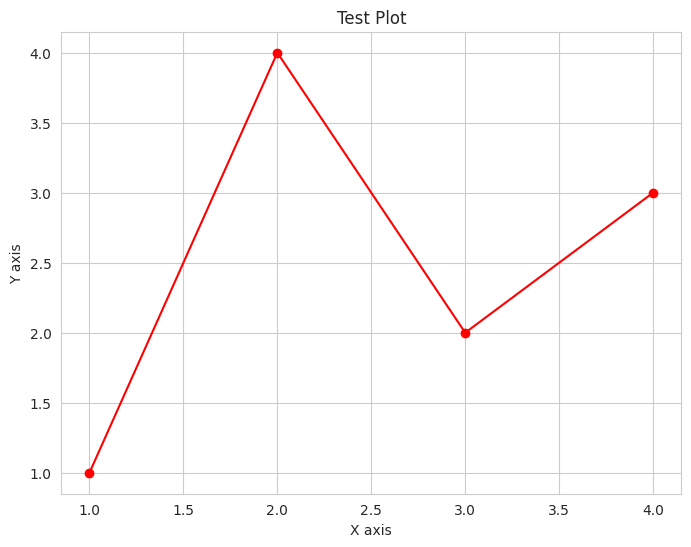

In [177]:
def test_basic_plot():
    """Test if basic plotting works"""
    print("Testing basic plotting...")

    # Create a simple plot
    plt.figure(figsize=(8, 6))
    plt.plot([1, 2, 3, 4], [1, 4, 2, 3], 'ro-')
    plt.title('Test Plot')
    plt.xlabel('X axis')
    plt.ylabel('Y axis')
    plt.grid(True)
    plt.show()

# Run basic plot test
test_basic_plot()

## 📊 Visualisation Functions Test

In [162]:
def test_visualizations():
    """Simple test for visualizations"""
    print("Testing visualizations...")

    # Create helper and get weather data
    helper = WeatherHelper()
    location = "Perth,Western Australia"

    # Get weather data
    print(f"Getting weather data for {location}...")
    weather = helper.get_weather_data(location)

    if weather:
        print("\nCreating temperature visualization...")
        helper.create_temperature_visualisation()

        print("\nCreating precipitation visualization...")
        helper.create_precipitation_visualisation()

        print("\nVisualizations complete!")
    else:
        print("Failed to get weather data")

# Run the test
test_visualizations()


Testing visualizations...
Getting weather data for Perth,Western Australia...
Fetching weather data from: https://wttr.in/Perth%2CWestern%20Australia?format=j1

Creating temperature visualization...

Creating precipitation visualization...

Visualizations complete!


## Natural Language Processing
---



In [178]:
# Define parse_weather_question()
def parse_weather_question(self, question):
    """Parse natural language weather questions."""
    # Convert question to lowercase for easier matching
    question = question.lower()

    # Initialize result dictionary
    result = {
        'location': self.current_location,  # Default to current location
        'time_period': 'current',  # Default to current time
        'weather_type': 'general',  # Default to general weather
        'confidence': 0.0
    }

    # Define keyword patterns
    time_patterns = {
        'current': ['now', 'current', 'at the moment'],
        'today': ['today', 'this day'],
        'tomorrow': ['tomorrow'],
        'week': ['week', 'forecast', '5 day', 'five day']
    }

    weather_patterns = {
        'temperature': ['temperature', 'temp', 'hot', 'cold', 'warm'],
        'rain': ['rain', 'precipitation', 'wet', 'umbrella'],
        'humidity': ['humid', 'humidity'],
        'wind': ['wind', 'windy', 'breeze']
    }

    # Extract location if specified
    location_match = re.search(r'in ([a-zA-Z\s,]+)', question)
    if location_match:
        result['location'] = location_match.group(1).strip()
        result['confidence'] += 0.3

    # Identify time period
    for period, patterns in time_patterns.items():
        if any(pattern in question for pattern in patterns):
            result['time_period'] = period
            result['confidence'] += 0.3
            break

    # Identify weather type
    for w_type, patterns in weather_patterns.items():
        if any(pattern in question for pattern in patterns):
            result['weather_type'] = w_type
            result['confidence'] += 0.4
            break

    return result

def generate_weather_response(self, parsed_query):
    """Generate natural language response based on parsed query."""
    try:
        if not self.weather_data:
            return "I don't have any weather data to work with. Please fetch weather data first."

        location = parsed_query['location']
        time_period = parsed_query['time_period']
        weather_type = parsed_query['weather_type']

        # Get relevant weather data
        if time_period == 'current':
            data = self.weather_data['current_condition'][0]
            if weather_type == 'temperature':
                return f"The current temperature in {location} is {data['temp_C']}°C ({data['temp_F']}°F)"
            elif weather_type == 'rain':
                return f"The precipitation in {location} is {data['precipMM']}mm with {data['humidity']}% humidity"
            elif weather_type == 'wind':
                return f"The wind speed in {location} is {data['windspeedKmph']} km/h from the {data['winddir16Point']}"
            else:
                return f"Current conditions in {location}: {data['weatherDesc'][0]['value']}, {data['temp_C']}°C"

        elif time_period == 'week':
            forecast = self.weather_data['weather']
            response = f"5-day forecast for {location}:\n"
            for day in forecast:
                response += f"\n{day['date']}: {day['maxtempC']}°C/{day['mintempC']}°C, "
                response += f"{day['hourly'][4]['weatherDesc'][0]['value']}"
            return response

        return f"I'm not sure about the weather in {location} for that time period."

    except Exception as e:
        return f"I had trouble generating a response: {str(e)}"

## 🧭 User Interface

In [164]:
def create_interactive_dashboard(self):
    """Create an interactive dashboard using ipywidgets."""
    # Location input
    location_input = widgets.Text(
        value='Perth,Western Australia',
        description='Location:',
        layout=widgets.Layout(width='50%')
    )

    # Question input
    question_input = widgets.Text(
        value='',
        placeholder='Ask about the weather...',
        description='Question:',
        layout=widgets.Layout(width='70%')
    )

    # Buttons
    update_button = widgets.Button(
        description='Update Weather',
        button_style='primary'
    )

    ask_button = widgets.Button(
        description='Ask Question',
        button_style='info'
    )

    # Display areas
    output_area = widgets.Output()
    viz_area = widgets.Output()

    def on_update_click(b):
        with output_area:
            output_area.clear_output()
            weather = self.get_weather_data(location_input.value)
            if weather:
                print(f"\nWeather updated for {location_input.value}")
                with viz_area:
                    viz_area.clear_output()
                    self.create_temperature_visualisation()
                    self.create_precipitation_visualisation()

    def on_ask_click(b):
        with output_area:
            output_area.clear_output()
            question = question_input.value
            if question:
                parsed = self.parse_weather_question(question)
                response = self.generate_weather_response(parsed)
                print(f"\nQ: {question}")
                print(f"A: {response}")

    update_button.on_click(on_update_click)
    ask_button.on_click(on_ask_click)

    # Layout
    controls = widgets.VBox([
        location_input,
        widgets.HBox([update_button, ask_button]),
        question_input,
        output_area,
        viz_area
    ])

    display(controls)

## 🧪 Interface Test for complete system

In [179]:
def test_nlp_system():
    """Test the Natural Language Processing capabilities"""

    print("🧪 Testing NLP System...")

    # Initialize helper
    helper = WeatherHelper()

    # Test location
    test_location = "Perth,Western Australia"
    print(f"\n1. Fetching initial weather data for {test_location}")
    weather = helper.get_weather_data(test_location)

    if weather:
        print("✅ Weather data retrieved successfully")

        # Test questions
        test_questions = [
            "What's the temperature in London now?",
            "Will it rain tomorrow in Paris?",
            "How's the weather in Tokyo this week?",
            "Is it windy in New York today?"
        ]

        print("\n2. Testing question parsing:")
        for question in test_questions:
            print(f"\nQ: {question}")
            parsed = helper.parse_weather_question(question)
            print(f"Parsed: {parsed}")
            response = helper.generate_weather_response(parsed)
            print(f"A: {response}")

    else:
        print("❌ Failed to retrieve weather data")

# Run the test
test_nlp_system()



🧪 Testing NLP System...

1. Fetching initial weather data for Perth,Western Australia
Fetching weather data from: https://wttr.in/Perth%2CWestern%20Australia?format=j1
✅ Weather data retrieved successfully

2. Testing question parsing:

Q: What's the temperature in London now?
Parsed: {'location': 'london now', 'time_period': 'current', 'weather_type': 'temperature', 'confidence': 1.0}
A: The current temperature in london now is 12°C (54°F)

Q: Will it rain tomorrow in Paris?
Parsed: {'location': 'tomorrow in paris', 'time_period': 'tomorrow', 'weather_type': 'rain', 'confidence': 1.0}
A: I'm not sure about the weather in tomorrow in paris for that time period.

Q: How's the weather in Tokyo this week?
Parsed: {'location': 'tokyo this week', 'time_period': 'week', 'weather_type': 'general', 'confidence': 0.6}
A: 5-day forecast for tokyo this week:

2025-05-23: 17°C/13°C, Patchy rain nearby
2025-05-24: 15°C/11°C, Cloudy 
2025-05-25: 19°C/12°C, Light rain shower

Q: Is it windy in New Yo

In [180]:
# Define create_interactive_weather_display()
def create_interactive_weather_display():
    location_input = widgets.Text(
        value='London',
        placeholder='Enter location',
        description='Location:',
        disabled=False
    )

    update_button = widgets.Button(
        description='Update Weather',
        disabled=False,
        button_style='primary',
        tooltip='Click to update weather data'
    )

    output = widgets.Output()
    # Status text for export feedback
    status_text = widgets.HTML(value='')

    # Location history
    location_history = widgets.Dropdown(
        options=[],
        description='History:',
        layout=widgets.Layout(width='200px')
    )

    # Initialise advisor here to be accessible within the function scope
    advisor = WeatherHelper()

    # Data export function
    def export_data(b):
        if advisor.weather_data:
            try:
                with open(f'{advisor.current_location}_weather.json', 'w') as f:
                    json.dump(advisor.weather_data, f)
                status_text.value = '<span style="color: green;">Data exported!</span>'
            except Exception as e:
                status_text.value = f'<span style="color: red;">Export failed: {str(e)}</span>'
        else:
            status_text.value = '<span style="color: orange;">No data to export. Fetch weather first.</span>'


    export_button = widgets.Button(
        description='Export Data',
        button_style='info',
        layout=widgets.Layout(width='100px')
    )
    export_button.on_click(export_data)


    def on_button_click(b):
        with output:
            output.clear_output()
            location = location_input.value
            weather = advisor.get_weather_data(location)
            if weather:
                # Add location to history if not already present
                if location not in location_history.options:
                    location_history.options = list(location_history.options) + [location]
                # Call visualisations (ensure method names match the class)
                advisor.create_temperature_visualisation()
                advisor.create_precipitation_visualisation()
            else:
                print("Failed to retrieve weather data.")
            # Clear status text after a delay or on next update
            status_text.value = ''


    update_button.on_click(on_button_click)

    # Arrange widgets in a VBox
    # Define widget_container here
    widget_container = widgets.VBox([
        widgets.HBox([location_input, update_button, location_history, export_button]),
        status_text, # Add status text below buttons
        output
    ])

    display(widget_container)

# Add visualisation options
chart_style = widgets.Dropdown(
    options=['default', 'dark_background', 'seaborn'],
    value='default',
    description='Style:',
    layout=widgets.Layout(width='200px')
)

def update_style(change):
    plt.style.use(change['new'])

chart_style.observe(update_style, names='value')


In [167]:
# Test the interactive display
create_interactive_weather_display()

In [181]:
# test_weather_helper.py

%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

def test_weather_visualizations():
    """Comprehensive test for weather visualizations"""

    print("🧪 Starting Weather Visualization Tests...")

    # Create instance
    helper = WeatherHelper()
    location = "Perth,Western Australia"

    # Test 1: Data Retrieval
    print(f"\n1. Fetching weather data for {location}")
    weather = helper.get_weather_data(location)

    if weather:
        print("✅ Weather data retrieved successfully")

        # Test 2: Temperature Visualization
        print("\n2. Testing temperature visualization...")
        try:
            # Clear previous plots
            plt.close('all')

            # Create new figure
            plt.figure(figsize=(12, 6))

            # Generate temperature plot
            temp_fig = helper.create_temperature_visualisation(output_type='figure')
            if temp_fig:
                display(temp_fig)
                plt.close(temp_fig)
                print("✅ Temperature visualization created successfully")

        except Exception as e:
            print(f"❌ Temperature visualization error: {e}")

        # Test 3: Precipitation Visualization
        print("\n3. Testing precipitation visualization...")
        try:
            # Clear previous plots
            plt.close('all')

            # Generate precipitation plot
            precip_fig = helper.create_precipitation_visualisation(output_type='figure')
            if precip_fig:
                display(precip_fig)
                plt.close(precip_fig)
                print("✅ Precipitation visualization created successfully")

        except Exception as e:
            print(f"❌ Precipitation visualization error: {e}")

    else:
        print("❌ Failed to retrieve weather data")

    print("\n🏁 Visualization tests completed")

def test_interactive_features():
    """Test interactive features with visualizations"""

    print("🧪 Testing Interactive Features...")

    helper = WeatherHelper()

    # Test questions with visualizations
    test_cases = [
        {
            'location': "Perth,Western Australia",
            'question': "What's the temperature like today?",
            'show_viz': True
        },
        {
            'location': "London,UK",
            'question': "Will it rain this week?",
            'show_viz': True
        }
    ]

    for case in test_cases:
        print(f"\nTesting case for {case['location']}")

        # Get weather data
        weather = helper.get_weather_data(case['location'])

        if weather:
            # Process question
            parsed = helper.parse_weather_question(case['question'])
            response = helper.generate_weather_response(parsed)

            print(f"Q: {case['question']}")
            print(f"A: {response}")

            if case['show_viz']:
                # Show visualizations
                print("\nGenerating visualizations...")

                # Temperature visualization
                temp_fig = helper.create_temperature_visualisation(output_type='figure')
                if temp_fig:
                    display(temp_fig)
                    plt.close(temp_fig)

                # Precipitation visualization
                precip_fig = helper.create_precipitation_visualisation(output_type='figure')
                if precip_fig:
                    display(precip_fig)
                    plt.close(precip_fig)

        else:
            print(f"❌ Failed to get weather data for {case['location']}")

    print("\n🏁 Interactive testing completed")

# Function to run all tests
def run_all_tests():
    """Run all WeatherHelper tests"""

    print("🚀 Starting WeatherHelper Test Suite\n")

    # Test visualizations
    test_weather_visualizations()

    print("\n" + "="*50 + "\n")

    # Test interactive features
    test_interactive_features()

    print("\n✨ All tests completed!")

# Run the tests
if __name__ == "__main__":
    run_all_tests()


🚀 Starting WeatherHelper Test Suite

🧪 Starting Weather Visualization Tests...

1. Fetching weather data for Perth,Western Australia
Fetching weather data from: https://wttr.in/Perth%2CWestern%20Australia?format=j1
✅ Weather data retrieved successfully

2. Testing temperature visualization...

3. Testing precipitation visualization...

🏁 Visualization tests completed


🧪 Testing Interactive Features...

Testing case for Perth,Western Australia
Fetching weather data from: https://wttr.in/Perth%2CWestern%20Australia?format=j1
Q: What's the temperature like today?
A: I'm not sure about the weather in Perth,Western Australia for that time period.

Generating visualizations...

Testing case for London,UK
Fetching weather data from: https://wttr.in/London%2CUK?format=j1
Q: Will it rain this week?
A: 5-day forecast for this week:

2025-05-23: 19°C/6°C, Partly Cloudy 
2025-05-24: 23°C/11°C, Partly Cloudy 
2025-05-25: 19°C/12°C, Partly Cloudy 

Generating visualizations...

🏁 Interactive testin

In [215]:
# Run specific test
test_weather_visualizations()

# Or run interactive features test
test_interactive_features()

# Or run all tests
run_all_tests()


🧪 Starting Weather Visualization Tests...

1. Fetching weather data for Perth,Western Australia
Fetching weather data from: https://wttr.in/Perth%2CWestern%20Australia?format=j1
✅ Weather data retrieved successfully

2. Testing temperature visualization...

3. Testing precipitation visualization...

🏁 Visualization tests completed
🧪 Testing Interactive Features...

Testing case for Perth,Western Australia
Fetching weather data from: https://wttr.in/Perth%2CWestern%20Australia?format=j1
Q: What's the temperature like today?
A: I'm not sure about the weather in Perth,Western Australia for that time period.

Generating visualizations...

Testing case for London,UK
Fetching weather data from: https://wttr.in/London%2CUK?format=j1
Q: Will it rain this week?
A: 5-day forecast for this week:

2025-05-23: 19°C/6°C, Partly Cloudy 
2025-05-24: 23°C/11°C, Partly Cloudy 
2025-05-25: 19°C/12°C, Partly Cloudy 

Generating visualizations...

🏁 Interactive testing completed
🚀 Starting WeatherHelper Te

## 🗂️ MAIN INTERFACE


In [220]:
def create_weather_dashboard():
    """Create a weather dashboard with simplified plots"""

    # Ensure matplotlib is properly configured
    %matplotlib inline
    # Ensure seaborn is imported to register its styles with matplotlib
    import seaborn as sns
    plt.style.use('seaborn-v0_8')

    # Create WeatherHelper instance
    helper = WeatherHelper()

    # Create main layout components
    main_container = widgets.VBox([
        # Header
        widgets.HTML(value="<h1>🌤️ WeatherWise Dashboard</h1>"),

        # Location input and buttons
        widgets.HBox([
            widgets.Text(
                value='Perth,Western Australia',
                placeholder='Enter location...',
                description='Location:',
                layout=widgets.Layout(width='50%')
            ),
            widgets.Button(
                description='Update Weather',
                button_style='primary'
            ),
            widgets.Button(
                description='Export Data',
                button_style='info'
            )
        ]),

        # Weather Info Output
        widgets.Output(layout=widgets.Layout(
            border='1px solid #ddd',
            padding='10px',
            margin='10px 0'
        )),

        # Combined Plot Output
        widgets.HTML(value="<h3>Weather Forecast:</h3>"),
        widgets.Output(layout=widgets.Layout(
            border='1px solid #ddd',
            padding='10px',
            margin='10px 0'
        )),

        # Question Section
        widgets.HTML(value="<h3>🔍 Ask about the weather:</h3>"),
        widgets.Text(
            placeholder='e.g., "What\'s the temperature today?" or "Will it rain tomorrow?"',
            description='Question:',
            layout=widgets.Layout(width='70%')
        ),
        widgets.Button(
            description='Ask Question',
            button_style='success'
        ),

        # Question Output
        widgets.Output(layout=widgets.Layout(
            border='1px solid #ddd',
            padding='10px',
            margin='10px 0'
        ))
    ])

    # Get widget references
    location_input = main_container.children[1].children[0]
    update_button = main_container.children[1].children[1]
    export_button = main_container.children[1].children[2]
    info_output = main_container.children[2]
    plot_output = main_container.children[4]
    question_input = main_container.children[6]
    ask_button = main_container.children[7]
    question_output = main_container.children[8]

    def create_weather_plots(weather_data):
        """Create simplified weather plots"""
        try:
            forecast = weather_data['weather']
            dates = [day['date'] for day in forecast]

            # Create figure with two subplots
            fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

            # Temperature plot
            max_temps = [float(day['maxtempC']) for day in forecast]
            min_temps = [float(day['mintempC']) for day in forecast]

            ax1.plot(dates, max_temps, 'r-o', label='Max Temperature')
            ax1.plot(dates, min_temps, 'b-o', label='Min Temperature')
            ax1.set_title(f'Temperature Forecast for {helper.current_location}')
            ax1.set_ylabel('Temperature (°C)')
            ax1.grid(True, alpha=0.3)
            ax1.legend()
            ax1.tick_params(axis='x', rotation=45)

            # Add temperature labels
            for i, (max_t, min_t) in enumerate(zip(max_temps, min_temps)):
                ax1.annotate(f'{max_t}°C', (i, max_t), textcoords="offset points",
                           xytext=(0,10), ha='center')
                ax1.annotate(f'{min_t}°C', (i, min_t), textcoords="offset points",
                           xytext=(0,-15), ha='center')

            # Rain chance plot
            rain_chances = []
            for day in forecast:
                hourly = day.get('hourly', [])
                max_chance = max([int(hour.get('chanceofrain', 0)) for hour in hourly])
                rain_chances.append(max_chance)

            bars = ax2.bar(dates, rain_chances, color='skyblue', alpha=0.6)
            ax2.set_title('Chance of Rain')
            ax2.set_ylabel('Probability (%)')
            ax2.grid(True, alpha=0.3)
            ax2.tick_params(axis='x', rotation=45)

            # Add percentage labels on bars
            for bar in bars:
                height = bar.get_height()
                ax2.text(bar.get_x() + bar.get_width()/2., height,
                        f'{int(height)}%', ha='center', va='bottom')

            plt.tight_layout()
            plt.show()

        except Exception as e:
            print(f"Error creating weather plots: {e}")

    def on_update_click(b):
        """Handle update button click"""
        with info_output:
            clear_output(wait=True)
            print(f"Fetching weather data for {location_input.value}...")
            weather = helper.get_weather_data(location_input.value)

            if weather:
                # Display current weather
                current = weather['current_condition'][0]
                print(f"\nCurrent Weather for {location_input.value}:")
                print(f"Temperature: {current['temp_C']}°C")
                print(f"Condition: {current['weatherDesc'][0]['value']}")
                print(f"Humidity: {current['humidity']}%")
                print(f"Wind: {current['windspeedKmph']} km/h")

                # Create plots
                with plot_output:
                    clear_output(wait=True)
                    create_weather_plots(weather)
            else:
                print("❌ Failed to fetch weather data")

    def on_ask_click(b):
        """Handle ask button click"""
        with question_output:
            clear_output(wait=True)
            question = question_input.value
            if question:
                parsed = helper.parse_weather_question(question)
                response = helper.generate_weather_response(parsed)
                print(f"Q: {question}")
                print(f"A: {response}")
            else:
                print("Please enter a weather-related question")

    def on_export_click(b):
        """Handle export button click"""
        if helper.weather_data:
            try:
                filename = f"{helper.current_location}_weather.json"
                with open(filename, 'w') as f:
                    json.dump(helper.weather_data, f, indent=2)
                with info_output:
                    print(f"✅ Weather data exported to {filename}")
            except Exception as e:
                with info_output:
                    print(f"❌ Export failed: {e}")
        else:
            with info_output:
                print("No weather data available. Please fetch weather data first.")

    # Connect callbacks to buttons
    update_button.on_click(on_update_click)
    ask_button.on_click(on_ask_click)
    export_button.on_click(on_export_click)

    # Display usage instructions
    print("🌟 Welcome to WeatherWise!")
    print("\nHow to use:")
    print("1. Enter a location and click 'Update Weather'")
    print("2. View current conditions and weather forecast")
    print("3. Ask weather-related questions like:")
    print("   - What's the temperature today?")
    print("   - Will it rain tomorrow?")
    print("   - How's the weather this week?")
    print("   - What should I wear today?")
    print("   - Is it good for outdoor activities?")
    print("   - Should I bring an umbrella?")
    print("   - What clothes should I pack for tomorrow?")
    print("4. Export weather data using the 'Export Data' button")


    # Display the dashboard
    display(main_container)

# Run the dashboard
create_weather_dashboard()


🌟 Welcome to WeatherWise!

How to use:
1. Enter a location and click 'Update Weather'
2. View current conditions and weather forecast
3. Ask weather-related questions like:
   - What's the temperature today?
   - Will it rain tomorrow?
   - How's the weather this week?
   - What should I wear today?
   - Is it good for outdoor activities?
   - Should I bring an umbrella?
   - What clothes should I pack for tomorrow?
4. Export weather data using the 'Export Data' button


Further considerations:


1.  Improving weather question parsing
2.  Add Data Visualization Enhancements
3.  Add Historical Data Comparison
4.  Add Weather Alerts and Warnings
5.  Add activity Recommendations


